In [1]:
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
def Load(pathname):
    data = np.loadtxt(pathname, delimiter=',')
    features = data[:, :-1]
    labels = data[:, -1]
    return features, labels

PATH = "5rel-10numAttrs-30totalAttrs-100maxTblSize-100buckets-300.csv"
PATH = "5rel-10numAttrs-27totalAttrs-100maxTblSize-100buckets-300.csv"

# With gaussian weights.
PATH = "5rel-10numAttrs-24totalAttrs-100maxTblSize-10buckets-300.csv"
PATH = "5rel-10numAttrs-22totalAttrs-100maxTblSize-10buckets-3000.csv"

features, labels = Load('./data/train-{}'.format(PATH))
test_features, test_labels = Load('./data/test-{}'.format(PATH))

In [3]:
features.shape, labels.shape

((500, 33), (500,))

In [4]:
scaler = StandardScaler()
features = scaler.fit_transform(features, labels)

In [5]:
regr = linear_model.LinearRegression(normalize=False)

In [6]:
regr.fit(features, labels)

/Users/zongheng/anaconda/envs/ray-0321/lib/python3.5/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
test_predicted_labels = regr.predict(scaler.transform(test_features))

In [8]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(test_labels, test_predicted_labels))
print("Variance score: %.2f"
      % r2_score(test_labels, test_predicted_labels))

Coefficients: 
 [ 0.00000000e+00  2.01151091e+12 -9.22829207e+11  5.98523233e+11
 -4.43831307e+12  2.14954460e+13  1.72358234e+13  1.67385056e+13
  2.03302681e+13  1.77171467e+13  1.62237224e+13  1.95055993e+13
  1.62237224e+13  1.62237224e+13  1.67385056e+13  1.45557485e+13
  1.67385056e+13  2.29351338e+13  2.45835303e+13  2.45835303e+13
  1.81837456e+13  2.18667391e+13  2.42657941e+13  2.11159125e+13
  1.86367262e+13  2.14954460e+13  2.22302047e+13  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.89349250e-01]
Mean squared error: 84.07
Variance score: 0.22


In [9]:
print('actual test labels', test_labels[:20])
print('predicted test labels', test_predicted_labels[:20])

actual test labels [12.  1.  1.  1. 10.  1.  1.  1. 12.  1.  1.  8. 10. 11.  1.  1.  1. 12.
  1. 17.]
predicted test labels [11.46661071  1.94729569  1.03989784  1.73659665 11.15095013  1.70788883
  1.06021924  2.55566432 10.9753851   2.69930843  2.06424472 10.94859303
 10.69346419  2.76650483  0.66120781  1.51717574  1.06947056 11.44360566
  1.3300637  10.86668101]


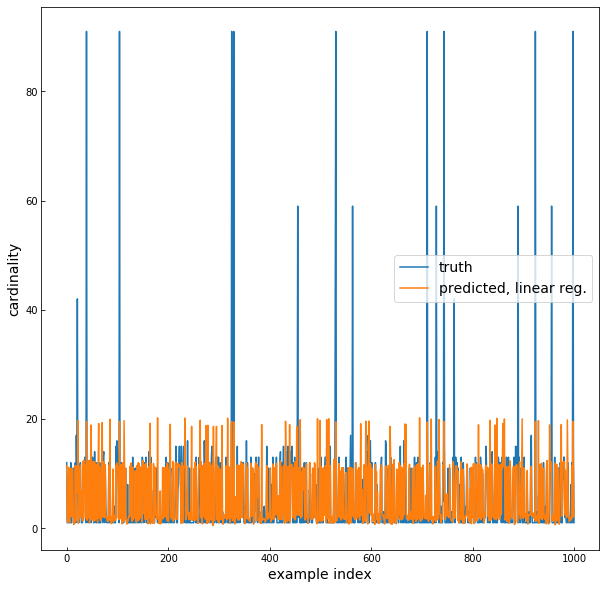

In [12]:
import matplotlib.pyplot as plt
ax = plt.figure(figsize=(10,10))
plt.xlabel('example index', fontsize=14)
plt.ylabel('cardinality', fontsize=14)
# plt.scatter(np.arange(len(test_labels)), test_labels, label='truth')
# plt.scatter(np.arange(len(test_predicted_labels)), test_predicted_labels, label='predicted, linear reg.')

plt.plot(test_labels, label='truth')
plt.plot(test_predicted_labels, label='predicted, linear reg.')
plt.legend(fontsize=14)

Text(0,0.5,'density')

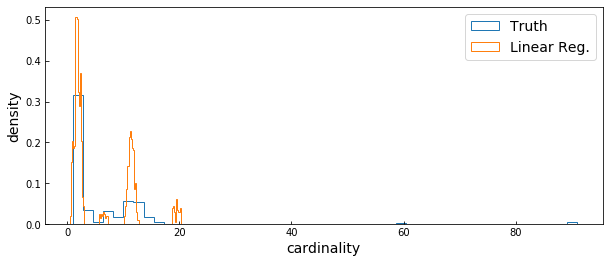

In [11]:

fig, ax = plt.subplots(figsize=(10, 4))
n, bins, patches = ax.hist(test_labels, bins=50, density=True, histtype='step',
                           cumulative=False, label='Truth')
n, bins, patches = ax.hist(test_predicted_labels, bins=100, density=True, histtype='step',
                           cumulative=False, label='Linear Reg.')
plt.legend(fontsize=14)
plt.xlabel('cardinality', fontsize=14)
plt.ylabel('density', fontsize=14)
# plt.xlim(-10,25)